In [23]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings. filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [24]:
data = pd.read_csv('Titanic-Dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data.drop(columns = ['Cabin', 'Ticket', 'Name'], inplace = True)

In [29]:
data.Age.fillna(data['Age'].median(), inplace = True)

In [30]:
data = data.dropna()

In [31]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [33]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## Data Visualization

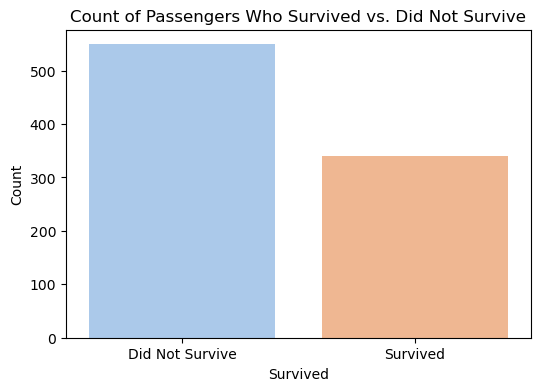

In [34]:
# Countplot of 'Survived' Column
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data, palette='pastel')
plt.title('Count of Passengers Who Survived vs. Did Not Survive')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()

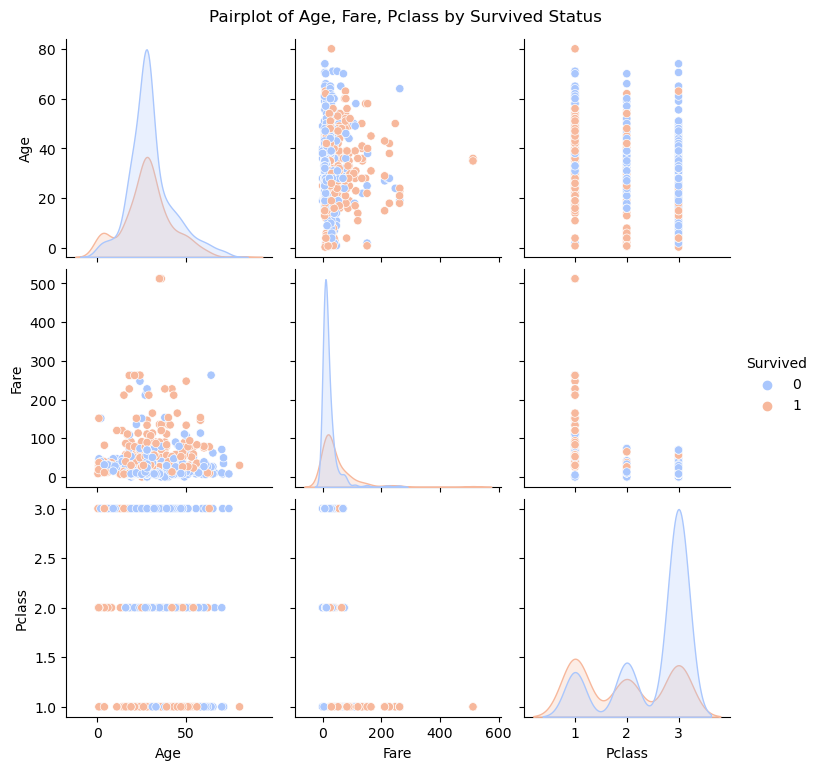

In [35]:
#Pairplot for multiple features by 'Survived' (e.g., 'Age', 'Fare', 'Pclass')
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Age, Fare, Pclass by Survived Status', y=1.02)
plt.show()

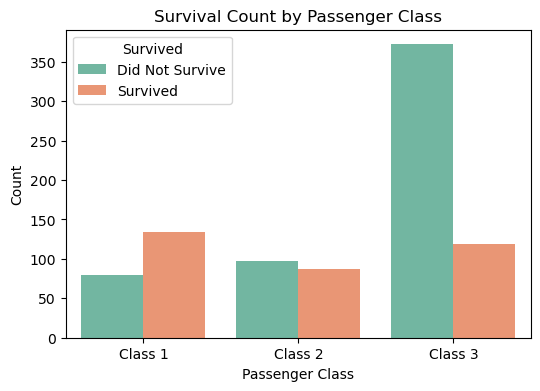

In [36]:
#Countplot of 'Pclass' and 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Class 1', 'Class 2', 'Class 3'])
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

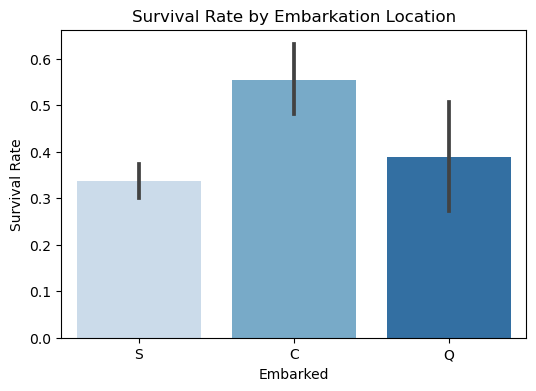

In [37]:
#Barplot of 'Embarked' by 'Survived'
plt.figure(figsize=(6, 4))
sns.barplot(x='Embarked', y='Survived', data=data, palette='Blues')
plt.title('Survival Rate by Embarkation Location')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.show()

# MODELLING AND MODEL EVALUATION

In [38]:
# Scale the numerical columns
scale = StandardScaler()
numeric_columns = ['Age', 'Fare']
data[numeric_columns] = scale.fit_transform(data[numeric_columns])

In [39]:
#encode the categorical columns
categorical_columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
#data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

In [40]:
#Select the feature and target for our models
y = data['Survived']
X = data.drop(columns=['Survived'])
#perform the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [41]:

#Insntiate the Logistic Regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
# Create predictions for the sets
X_pred = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

train_report = classification_report(y_train, X_pred)
test_report = classification_report(y_test, y_pred)


print('The results of the Logistic Regression are as follows:','\n')
print('The training report is:','\n',train_report, '\n')
print('The test report is:', '\n', test_report)


The results of the Logistic Regression are as follows: 

The training report is: 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       408
           1       0.78      0.70      0.74       258

    accuracy                           0.81       666
   macro avg       0.80      0.79      0.79       666
weighted avg       0.80      0.81      0.80       666
 

The test report is: 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       141
           1       0.69      0.72      0.71        82

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



In [42]:
#instantiate and fit the Decisoin tree classifier on to the train and test sets
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
#Create the predictions for the train and test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
#Create a classification report that will give the metrics for succes
clf_train_report = classification_report(y_train, y_train_pred)
clf_test_report = classification_report(y_test, y_test_pred)
#Print the results of theclassification report
print('The training report for Decision tree is:','\n',clf_train_report, '\n')
print('The test report for Decision tree is:', '\n', clf_test_report)

The training report for Decision tree is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       258

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666
 

The test report for Decision tree is: 
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       141
           1       0.62      0.70      0.66        82

    accuracy                           0.73       223
   macro avg       0.71      0.72      0.72       223
weighted avg       0.74      0.73      0.73       223



In [43]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_train_pred = rfc.predict(X_train)
rfc_test_pred = rfc.predict(X_test)

rfc_train_report = classification_report(y_train, rfc_train_pred)
rfc_test_report = classification_report(y_test, rfc_test_pred)

print('The training report for SVM is:','\n',rfc_train_report, '\n')
print('The test report for SVM tree is:', '\n', rfc_test_report)

The training report for SVM is: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       258

    accuracy                           1.00       666
   macro avg       1.00      1.00      1.00       666
weighted avg       1.00      1.00      1.00       666
 

The test report for SVM tree is: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       141
           1       0.72      0.71      0.72        82

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [44]:
#Tune the Logistic Regression Parameters
#Set  a parameter grid
model = LogisticRegression(solver='liblinear')
log_param = {'C':[0.01,0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet', None]}
#set up a grid search
from sklearn.model_selection import GridSearchCV
log_grid = GridSearchCV(estimator=logreg, param_grid=log_param, scoring='accuracy', cv=5, verbose=1)
#Fit the grid searh model on the train data
log_grid.fit(X_train, y_train)
#Check o he best paramters
print('The best parameters are:','\n', log_grid.best_params_, '\n')
#Evaluate on the test data
log_tuned = log_grid.best_estimator_
y_log_tuned = log_tuned.predict(X_test)
log_report = classification_report(y_test, y_log_tuned)
print('The report for the  tuned Logistic Regression is as follows:','\n',log_report)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
The best parameters are: 
 {'C': 10, 'penalty': 'l2'} 

The report for the  tuned Logistic Regression is as follows: 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       141
           1       0.69      0.76      0.72        82

    accuracy                           0.78       223
   macro avg       0.77      0.78      0.77       223
weighted avg       0.79      0.78      0.79       223



In [45]:
#Tune the parameters for the Decsioin Tree
#crate the parameter_grid
dt_param = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']}
#Perform the Grid Search
dt_grid = GridSearchCV(estimator=clf, param_grid=dt_param,scoring='accuracy', cv = 5, verbose=1)
#fit the grid onto the train sets
dt_grid.fit(X_train, y_train)
#Show the best parameters 
print('The best parameters are:','\n', dt_grid.best_params_, '\n')
#Evaluate on the test data
dt_tuned = dt_grid.best_estimator_
y_dt_tuned = dt_tuned.predict(X_test)
dt_report = classification_report(y_test, y_dt_tuned)
print('The report for the tuned Decision tree with best estimators is as follows:','\n',dt_report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
The best parameters are: 
 {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2} 

The report for the tuned Decision tree with best estimators is as follows: 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83       141
           1       0.70      0.77      0.73        82

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.78       223
weighted avg       0.80      0.79      0.80       223



In [46]:
#tune the parameters for the RandomForest models
#Create the parameters for the grid search
rfc_param = {'n_estimators':[50, 100, 200],
             'max_depth':[10, 20, 30],
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1, 2, 4],
             'max_features':['sqrt', 'log2', None]}
#create the grid 
rfc_grid = GridSearchCV(estimator= rfc, param_grid=rfc_param, scoring = 'accuracy', cv = 5, verbose = 1)
#fit the grid onto the traon sets
rfc_grid.fit(X_train, y_train)
#show the best parameters
print('The best parameters are:', '\n', rfc_grid.best_params_, '\n')
#Evaluate on the test data
rfc_tuned = rfc_grid.best_estimator_
y_rfc_tuned = rfc_tuned.predict(X_test)
#Create a classification report to view the metrics of the tuned model
rfc_report = classification_report(y_test, y_rfc_tuned)
print('The report for the tuned Random Forest Classiffier with best estimators is as follows:','\n',rfc_report)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
The best parameters are: 
 {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100} 

The report for the tuned Random Forest Classiffier with best estimators is as follows: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       141
           1       0.75      0.70      0.72        82

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



Here's an analysis of the results:
---
### **1. Logistic Regression**
**Training Report**:
- **Class 0** has better precision (0.82), recall (0.88), and f1-score (0.85) compared to **Class 1**, which has slightly lower recall (0.70) and f1-score (0.74).
- Overall training accuracy: **81%**.
- The model is well-balanced in performance, but there is some imbalance in handling the two classes.

**Test Report**:
- Performance on the test set is slightly lower than the training set:
  - Class 0 performs better with precision (0.83) and recall (0.82).
  - Class 1 shows a drop in precision (0.69) and f1-score (0.71).
- Test accuracy: **78%**, indicating slight overfitting.


### **2. Decision Tree**
**Training Report**:
- The Decision Tree achieves **perfect metrics** (precision, recall, f1-score = 1.00) on the training set. This suggests overfitting.

**Test Report**:
- Performance drops significantly on the test set:
  - Class 0: Precision (0.81), recall (0.75), and f1-score (0.78).
  - Class 1: Precision (0.62), recall (0.70), and f1-score (0.66).
- Test accuracy: **73%**.
- This drop indicates the model does not generalize well to unseen data due to overfitting.


### **3. Support Vector Machine (SVM)**
**Training Report**:
- SVM achieves perfect metrics (precision, recall, f1-score = 1.00) on the training set, indicating overfitting.

**Test Report**:
- Test performance is better than the Decision Tree but slightly worse than Logistic Regression:
  - Class 0: Precision (0.83), recall (0.85), and f1-score (0.84).
  - Class 1: Precision (0.73), recall (0.70), and f1-score (0.71).
- Test accuracy: **79%**.
- SVM generalizes slightly better than Decision Tree but still shows signs of overfitting.


### **4. Tuned Logistic Regression**
- Hyperparameter tuning improves performance:
  - Best parameters: `C=10`, `penalty='l2'`.
  - Class 0 precision increases slightly (0.85), while Class 1 recall improves to 0.76, resulting in a balanced f1-score of **0.72** for Class 1.
  - Accuracy remains at **78%**, but macro and weighted averages show a slight improvement in balance between the two classes.


### **5. Tuned Decision Tree**
- Hyperparameter tuning significantly reduces overfitting:
  - Best parameters: `{criterion='gini', max_depth=5, min_samples_leaf=5}`.
  - Test accuracy improves to **79%**.
  - Both classes see better balance:
    - Class 0: Precision (0.86), recall (0.81), f1-score (0.83).
    - Class 1: Precision (0.70), recall (0.77), f1-score (0.73).


### **6. Tuned Random Forest Classifier**
- Hyperparameter tuning improves generalization:
  - Best parameters: `{max_depth=30, max_features='log2', n_estimators=50}`.
  - Test accuracy: **81%**, the highest among all models.
  - Class 0: Precision (0.83), recall (0.87), f1-score (0.85).
  - Class 1: Precision (0.76), recall (0.70), f1-score (0.73).
- The Random Forest provides a good trade-off between complexity and generalization.


### **Overall Observations**
1. **Logistic Regression (Tuned)** and **Random Forest (Tuned)** offer the best balance of accuracy and generalization. 
2. The **Decision Tree** and **SVM** show overfitting on the training set, but tuning improves their generalization.
3. **Random Forest** is the best performer in terms of overall accuracy and stability on the test set.
4. **Model Selection** should depend on the task priorities:
   - If interpretability is crucial, go with Logistic Regression.
   - For higher performance, Random Forest is preferred.